In [1]:
import numpy as np


In [2]:
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [3]:
data_batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle('cifar-10-batches-py/data_batch_5')

In [4]:
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [5]:
X = np.append(data_batch_1['data'], data_batch_2['data'], axis = 0)
X = np.append(X, data_batch_3['data'], axis = 0)
X = np.append(X, data_batch_4['data'], axis = 0)
X = np.append(X, data_batch_5['data'], axis = 0)

In [6]:

Y = np.append(data_batch_1['labels'], data_batch_2['labels'],  axis = 0)
Y = np.append(Y, data_batch_3['labels'], axis = 0)
Y = np.append(Y, data_batch_4['labels'], axis = 0)
Y = np.append(Y, data_batch_5['labels'], axis = 0)

In [7]:
class NearestNeighbor:
    def __init__(self):
        pass
    def train(self, data, label):
        """data has shape # of training examples X #pixels in image
        and label is one-dimensional of size # of training examples """
        #Memorise all training data
        self.Xtr = data
        self.Ytr = label
        return
    def predict(self, test):
        """test has shape batch X #pixels in image"""
        # Find closest example to each test example in training set
        test_size = test.shape[0]
        test_pred = np.zeros(test_size, dtype=self.Ytr.dtype)
        test_close = np.zeros((test_size, 3*32*32), dtype=self.Xtr.dtype)
        # Loop over the test batch size
        for i in range(test_size):
            # Find the distance to every element of training set
            distance = np.sum(np.abs(self.Xtr - test[i,:]), axis = 1)
            # Find closest example
            mind = np.argmin(distance)
            test_pred[i] = self.Ytr[mind]
            test_close[i,:] = self.Xtr[mind, :]
        return test_pred, test_close
    

In [8]:
NN = NearestNeighbor()

In [9]:
NN.train(X, Y)

In [10]:
Ypred, test_close = NN.predict(test_batch['data'][1:11, :])

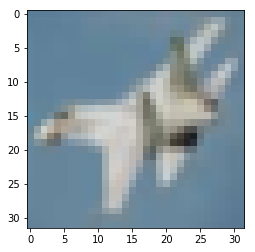

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = np.moveaxis(test_batch['data'][10 , :].reshape(3,32,32), 0, -1)
plt.imshow(image)
plt.show()

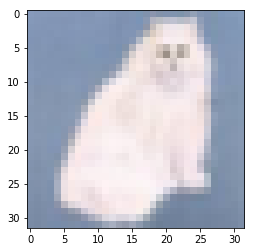

In [15]:
image = np.moveaxis(test_close[9 , :].reshape(3,32,32), 0, -1)
plt.imshow(image)
plt.show()

In [16]:
# predicted labels for test
Ypred

array([8, 1, 0, 4, 2, 2, 5, 0, 8, 3])

In [27]:
#load what the labels correspond to
label_names = unpickle('cifar-10-batches-py/batches.meta')

In [28]:
label_names

{'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_cases_per_batch': 10000,
 'num_vis': 3072}